In [1]:
#imports
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Load training data

#See the train folder for the files to read :
#total_acc_x_train.txt
#ay_train
#az_train

#Each one is (7352, 128)
ax_train = np.loadtxt('HARDataset/train/Inertial_Signals/total_acc_x_train.txt')
print(np.shape(ax_train))

ay_train = np.loadtxt('HARDataset/train/Inertial_Signals/total_acc_y_train.txt')
print(np.shape(ay_train))

az_train = np.loadtxt('HARDataset/train/Inertial_Signals/total_acc_z_train.txt')
print(np.shape(az_train))

# Load labels
y_train = np.loadtxt('HARDataset/train/y_train.txt')
print(np.shape(y_train))
# (7352, )

# % Define sampling frequency (in Hz) 
fs = 50;

(7352, 128)
(7352, 128)
(7352, 128)
(7352,)


### Load Test Data

In [3]:
#x,y and z accel data for testing is stacked shoulder to shoulder and pickled:
#test_acc = 'test/total_acc_xyz_test.npy'
#a_test = np.load(test_acc)
#print(a_test.shape)

#labels for the test data
#test_y = 'test/y_test.npy'
#y_test = np.load(test_y)
#print(y_test.shape)


ax_test = np.loadtxt('HARDataset/test/Inertial_Signals/total_acc_x_test.txt')
print(np.shape(ax_test))

ay_test = np.loadtxt('HARDataset/test/Inertial_Signals/total_acc_y_test.txt')
print(np.shape(ay_test))

az_test = np.loadtxt('HARDataset/test/Inertial_Signals/total_acc_z_test.txt')
print(np.shape(az_test))

a_test = np.concatenate((ax_test, ay_test, az_test),axis=1)
# (2947, 384)

# Load labels
y_test = np.loadtxt('HARDataset/test/y_test.txt')
print(np.shape(y_test))
# (2947,)

(2947, 128)
(2947, 128)
(2947, 128)
(2947,)


In [4]:
g = 9.80665 #m/sec2

In [5]:
#Normalization!

og_meanx = np.mean(np.mean(ax_train,axis=1))
og_meany = np.mean(np.mean(ay_train,axis=1))
og_meanz = np.mean(np.mean(az_train,axis=1))

og_stdx = np.std(np.std(ax_train,axis=1))
og_stdy = np.std(np.std(ay_train,axis=1))
og_stdz = np.std(np.std(az_train,axis=1))


ax_train -= og_meanx
ay_train -= og_meany
az_train -= og_meanz

meanx_train = np.mean(ax_train,axis=1)
meany_train = np.mean(ay_train,axis=1)
meanz_train = np.mean(az_train,axis=1)

ax_train /= og_stdx
ay_train /= og_stdy
az_train /= og_stdz

stdx_train = np.std(ax_train,axis=1)
stdy_train = np.std(ay_train,axis=1)
stdz_train = np.std(az_train,axis=1)

print(np.mean(np.mean(ax_train,axis=1)))
print(np.mean(np.mean(ay_train,axis=1)))
print(np.mean(np.mean(az_train,axis=1)))

print(np.std(np.std(ax_train,axis=1)))
print(np.std(np.std(ay_train,axis=1)))
print(np.std(np.std(az_train,axis=1)))


#need to normalize test data too
#x y z dims in columns
print(np.shape(a_test))
print(np.shape(a_test[:,:128]))
print(np.shape(a_test[:,128:256]))
print(np.shape(a_test[:,256:]))


ax_test = a_test[:,:128]
ay_test = a_test[:,128:256]
az_test = a_test[:,256:]

#ax_test -= og_meanx
#ay_test -= og_meany
#az_test -= og_meanz


#ax_test /= og_stdx
#ay_test /= og_stdy
#az_test /= og_stdz

#a_test = np.concatenate((ax_test, ay_test, az_test),axis=1)

0.0
9.278033546377805e-17
-1.2370711395170406e-16
0.9999999999999999
0.9999999999999999
0.9999999999999999
(2947, 384)
(2947, 128)
(2947, 128)
(2947, 128)


In [6]:
#walking
act1 = (y_train == 1)
ax1 = np.mean(ax_train[act1],axis=1)
ay1 = np.mean(ay_train[act1],axis=1)
az1 = np.mean(az_train[act1],axis=1)

#walking up
act2 = (y_train == 2) 
ax2 = np.mean(ax_train[act2],axis=1)
ay2 = np.mean(ay_train[act2],axis=1)
az2 = np.mean(az_train[act2],axis=1)

#walking down
act3 = (y_train == 3) 
ax3 = np.mean(ax_train[act3],axis=1)
ay3 = np.mean(ay_train[act3],axis=1)
az3 = np.mean(az_train[act3],axis=1)

#sitting
act4 = (y_train == 4) 
ax4 = np.mean(ax_train[act4],axis=1)
ay4 = np.mean(ay_train[act4],axis=1)
az4 = np.mean(az_train[act4],axis=1)

#standing up
act5 = (y_train == 5) 
ax5 = np.mean(ax_train[act5],axis=1)
ay5 = np.mean(ay_train[act5],axis=1)
az5 = np.mean(az_train[act5],axis=1)

#laying
act6 = (y_train == 6) 
ax6 = np.mean(ax_train[act6],axis=1)
ay6 = np.mean(ay_train[act6],axis=1)
az6 = np.mean(az_train[act6],axis=1)


#statistics/possible features
print("Means:")
print("WALK: ",np.mean(ax1*g), "\t",np.mean(ay1*g), "\t",np.mean(az1*g))
print("WUP:  ",np.mean(ax2*g), "\t",np.mean(ay2*g),"\t", np.mean(az2*g))
print("WDN:  ", np.mean(ax3*g), "\t",np.mean(ay3*g), "\t",np.mean(az3*g))
print("SIT:  ",np.mean(ax4*g), "\t",np.mean(ay4*g), "\t",np.mean(az4*g))
print("SND:  ",np.mean(ax5*g), "\t",np.mean(ay5*g),"\t", np.mean(az5*g))
print("LAY:  ",np.mean(ax6*g), "\t",np.mean(ay6*g),"\t", np.mean(az6*g))

print("\nStds:")
print("WALK:  ",np.std(ax1*g),"\t",np.std(ay1*g), "\t",np.std(az1*g))
print("WUP:   ",np.std(ax2*g), "\t",np.std(ay2*g), "\t",np.std(az2*g))
print("WDN:   ", np.std(ax3*g), "\t",np.std(ay3*g), "\t",np.std(az3*g))
print("SIT:   ",np.std(ax4*g),"\t", np.std(ay4*g),"\t", np.std(az4*g))
print("SND:   ",np.std(ax5*g), "\t",np.std(ay5*g), "\t",np.std(az5*g))
print("LAY:   ",np.std(ax6*g), "\t",np.std(ay6*g), "\t",np.std(az6*g))

#means and sds definitely make good features

Means:
WALK:  12.843051123294055 	 -24.06595123169749 	 -20.565433653247172
WUP:   9.742430710112098 	 -34.587930248477065 	 -31.873957398735772
WDN:   12.580645882475496 	 -20.276314225906653 	 -18.787722444708407
SIT:   9.83187980521473 	 13.10896104983428 	 8.94763232779695
SND:   13.244116061585094 	 -21.983206246914534 	 -15.63772266520724
LAY:   -49.356743828964966 	 71.04261028187256 	 62.4863170196552

Stds:
WALK:   2.029781569543877 	 9.417352523293623 	 20.953895504154108
WUP:    3.41401936524872 	 11.37458030148533 	 26.183417787848104
WDN:    2.1237660205975457 	 10.391875732753677 	 21.204626458190948
SIT:    7.012368863417452 	 21.413670241379258 	 28.884520588246325
SND:    1.618796742221326 	 11.477434579241432 	 20.89128139957286
LAY:    9.446862856972935 	 36.1921700126668 	 51.467116992752956


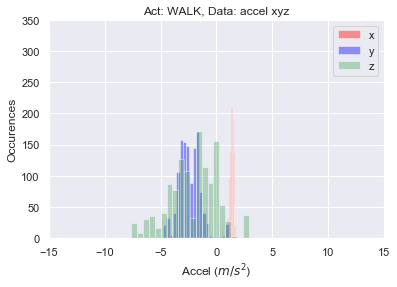

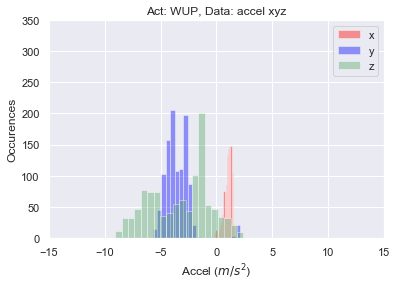

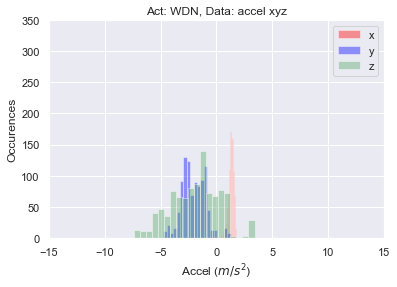

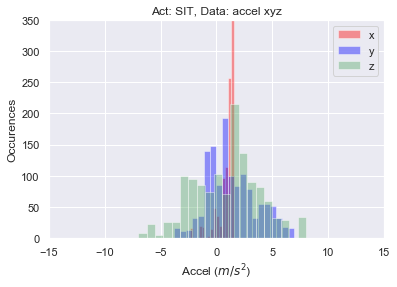

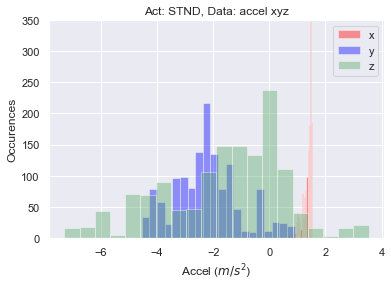

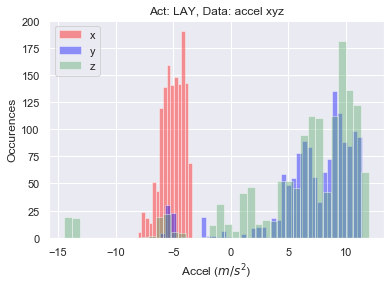

In [7]:
##Acceleration Plots in 3D

#WALK
plt.plot()
sns.distplot(ax1, bins=20, color='red', kde=False);
sns.distplot(ay1, bins=20, color='blue', kde=False);
sns.distplot(az1, bins=20, color='g', kde=False);

plt.xlabel(r'Accel ($m/s^2$)')
plt.ylabel("Occurences")
plt.title("Act: WALK, Data: accel xyz")
plt.legend(["x","y","z"])
plt.xlim([-15, 15]); plt.ylim([0,350])
plt.show()


#WUP
plt.plot()
sns.distplot(ax2, bins=20, color='red', kde=False);
sns.distplot(ay2, bins=20, color='blue', kde=False);
sns.distplot(az2, bins=20, color='g', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: WUP, Data: accel xyz")
plt.legend(["x","y","z"])
plt.xlim([-15, 15]); plt.ylim([0,350])
plt.show()


#WDN
plt.plot()
sns.distplot(ax3, bins=15, color='red', kde=False);
sns.distplot(ay3, bins=20, color='blue', kde=False);
sns.distplot(az3, bins=20, color='g', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: WDN, Data: accel xyz")
plt.legend(["x","y","z"])
plt.xlim([-15, 15]); plt.ylim([0,350])
plt.show()


#SIT
plt.plot()
sns.distplot(ax4, bins=15, color='red', kde=False);
sns.distplot(ay4, bins=20, color='blue', kde=False);
sns.distplot(az4, bins=20, color='g', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: SIT, Data: accel xyz")
plt.legend(["x","y","z"])
plt.xlim([-15, 15]); plt.ylim([0,350])
plt.show()


#STND
plt.plot()
sns.distplot(ax5, bins=20, color='red', kde=False);
sns.distplot(ay5, bins=20, color='blue', kde=False);
sns.distplot(az5, bins=20, color='g', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: STND, Data: accel xyz")
plt.legend(["x","y","z"])
#plt.xlim([-15, 15]); 
plt.ylim([0,350])
plt.show()


#LAY
plt.plot()
sns.distplot(ax6, bins=15, color='red', kde=False);
sns.distplot(ay6, bins=40, color='blue', kde=False);
sns.distplot(az6, bins=40, color='g', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: LAY, Data: accel xyz")
plt.legend(["x","y","z"])
#plt.xlim([-15, 15]); plt.ylim([0,350])
plt.show()

#mode may be a good feature as well

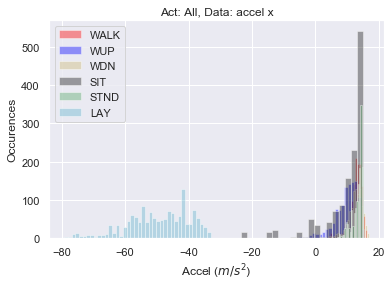

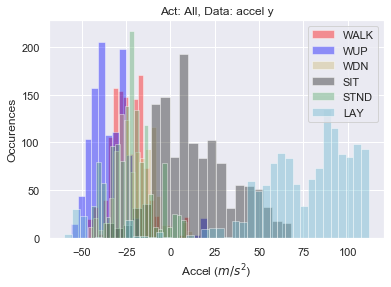

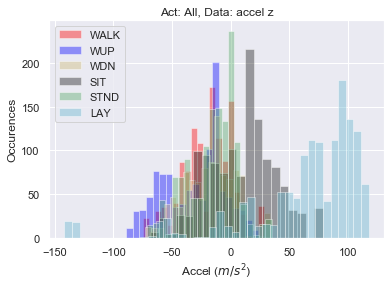

In [8]:
#Acceration Plots by Act

#X
plt.plot()
sns.distplot(ax1*g, bins=20, color='red', kde=False);
sns.distplot(ax2*g, bins=20, color='blue', kde=False);
sns.distplot(ax3*g, bins=20, color='y',kde=False);
sns.distplot(ax4*g, bins=20, color='k',kde=False);
sns.distplot(ax5*g, bins=20, color='g', kde=False);
sns.distplot(ax6*g, bins=40, color='c', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: All, Data: accel x")
plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
#plt.xlim([-5, 15]); plt.ylim([0,350])
plt.show()


#Y
plt.plot()
sns.distplot(ay1*g, bins=20, color='red', kde=False);
sns.distplot(ay2*g, bins=20, color='blue', kde=False);
sns.distplot(ay3*g, bins=20, color='y',  kde=False);
sns.distplot(ay4*g, bins=20, color='k',kde=False);
sns.distplot(ay5*g, bins=20, color='g', kde=False);
sns.distplot(ay6*g, bins=40, color='c', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: All, Data: accel y")
plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
#plt.xlim([-5, 12.5]); plt.ylim([0,350])
plt.show()


#Z
plt.plot()
sns.distplot(az1*g, bins=20, color='red', kde=False);
sns.distplot(az2*g, bins=20, color='blue', kde=False);
sns.distplot(az3*g, bins=20, color='y', kde=False);
sns.distplot(az4*g, bins=20, color='k',kde=False);
sns.distplot(az5*g, bins=20, color='g', kde=False);
sns.distplot(az6*g, bins=40, color='c', kde=False);

plt.xlabel(r'Accel ($m/s^2$)'); plt.ylabel("Occurences")
plt.title("Act: All, Data: accel z")
plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
#plt.xlim([-5, 12.5]); plt.ylim([0,350])
plt.show()



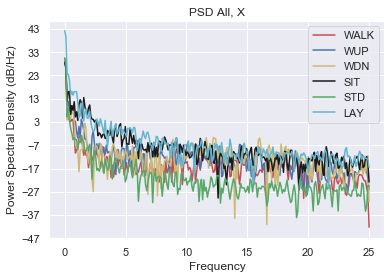

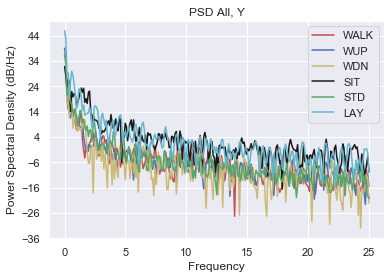

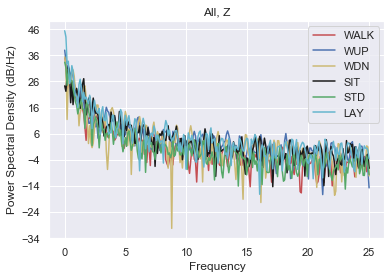

In [9]:
#this is basic version of PSD, below is better, so these aren't features

#X Direction
plt.plot()
plt.psd(ax1*g, 512, fs, color="r",label='WALK');
plt.psd(ax2*g, 512, fs, color="b", label='WUP');
plt.psd(ax3*g, 512, fs, color="y", label='WDN');
plt.psd(ax4*g, 512, fs, color="k", label='SIT');
plt.psd(ax5*g, 512, fs, color="g", label='STD');
plt.psd(ax6*g, 512, fs, color="c", label='LAY');
plt.legend(); plt.title("PSD All, X")
plt.show()


#Y Direction
plt.plot()
plt.psd(ay1*g, 512, fs, color="r",label='WALK');
plt.psd(ay2*g, 512, fs, color="b", label='WUP');
plt.psd(ay3*g, 512, fs, color="y", label='WDN');
plt.psd(ay4*g, 512, fs, color="k", label='SIT');
plt.psd(ay5*g, 512, fs, color="g", label='STD');
plt.psd(ay6*g, 512, fs, color="c", label='LAY');
plt.legend(); plt.title("PSD All, Y")
plt.show()


#Z Direction
plt.plot()
plt.psd(az1*g, 512, fs, color="r",label='WALK');
plt.psd(az2*g, 512, fs, color="b", label='WUP');
plt.psd(az3*g, 512, fs, color="y", label='WDN');
plt.psd(az4*g, 512, fs, color="k", label='SIT');
plt.psd(az5*g, 512, fs, color="g", label='STD');
plt.psd(az6*g, 512, fs, color="c", label='LAY');
plt.legend(); plt.title("All, Z")
plt.show()

Ideas / Features to Investigate

Mean: Walking vs Laying

RMS or standard deviation: Walking vs Standing

PSD/welch: Walking vs walking up

Ref: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html 

Hint: peaks. how can we find peaks? 

Find n peaks; at least t0 apart.



128 (time series) x 3 directions

Ideas for features: 

1. Mean
2. SD
3. PSD/welch
4. Signal magnitude area
5. Entropy
6. Signal-Pair Correlation


In [10]:
from scipy import signal

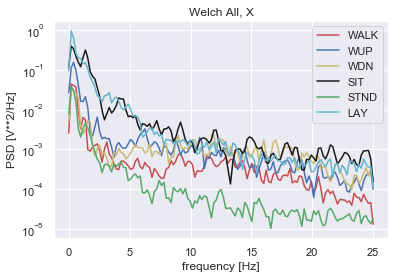

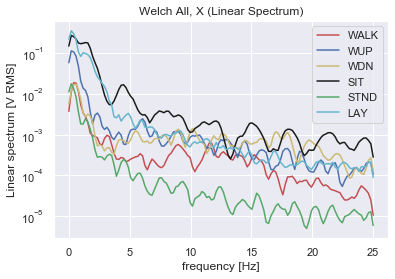

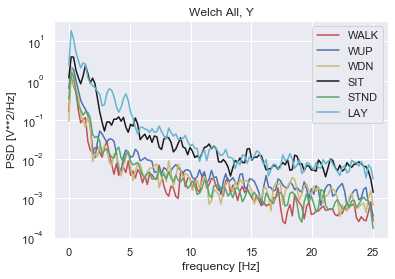

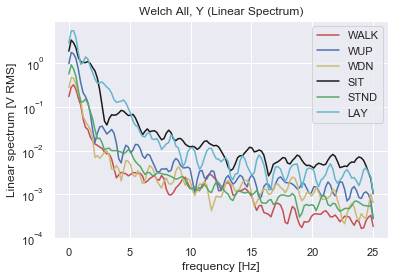

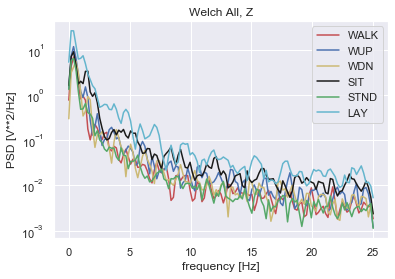

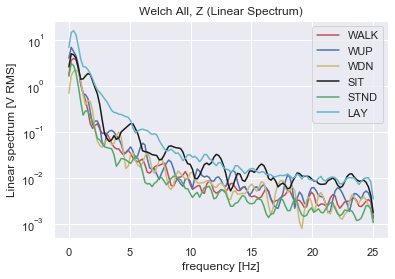

In [11]:
#Welch by Act

#x welch
f1, Pxx_den1 = signal.welch(ax1, fs)
f2, Pxx_den2 = signal.welch(ax2, fs)
f3, Pxx_den3 = signal.welch(ax3, fs)
f4, Pxx_den4 = signal.welch(ax4, fs)
f5, Pxx_den5 = signal.welch(ax5, fs)
f6, Pxx_den6 = signal.welch(ax6, fs)

plt.figure()
plt.semilogy(f1, Pxx_den1,color="r")
plt.semilogy(f2, Pxx_den2,color="b")
plt.semilogy(f3, Pxx_den3,color="y")
plt.semilogy(f4, Pxx_den4,color="k")
plt.semilogy(f5, Pxx_den5,color="g")
plt.semilogy(f6, Pxx_den6,color="c")
plt.title("Welch All, X"); plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()

#linear spectrum (suggested by documentation)
f1, Pxx_spec1 = signal.welch(ax1, fs, 'flattop', scaling='spectrum')
f2, Pxx_spec2 = signal.welch(ax2, fs, 'flattop', scaling='spectrum')
f3, Pxx_spec3 = signal.welch(ax3, fs, 'flattop', scaling='spectrum')
f4, Pxx_spec4 = signal.welch(ax4, fs, 'flattop', scaling='spectrum')
f5, Pxx_spec5 = signal.welch(ax5, fs, 'flattop', scaling='spectrum')
f6, Pxx_spec6 = signal.welch(ax6, fs, 'flattop', scaling='spectrum')

plt.figure()
plt.semilogy(f1, Pxx_spec1,color="r")
plt.semilogy(f2, Pxx_spec2,color="b")
plt.semilogy(f3, Pxx_spec3,color="y")
plt.semilogy(f4, Pxx_spec4,color="k")
plt.semilogy(f5, Pxx_spec5,color="g")
plt.semilogy(f6, Pxx_spec6,color="c")
plt.title("Welch All, X (Linear Spectrum)"); plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
plt.xlabel('frequency [Hz]'); plt.ylabel('Linear spectrum [V RMS]')
plt.show()



#y welch
f1, Pxx_den1 = signal.welch(ay1, fs)
f2, Pxx_den2 = signal.welch(ay2, fs)
f3, Pxx_den3 = signal.welch(ay3, fs)
f4, Pxx_den4 = signal.welch(ay4, fs)
f5, Pxx_den5 = signal.welch(ay5, fs)
f6, Pxx_den6 = signal.welch(ay6, fs)

plt.figure()
plt.semilogy(f1, Pxx_den1,color="r")
plt.semilogy(f2, Pxx_den2,color="b")
plt.semilogy(f3, Pxx_den3,color="y")
plt.semilogy(f4, Pxx_den4,color="k")
plt.semilogy(f5, Pxx_den5,color="g")
plt.semilogy(f6, Pxx_den6,color="c")
plt.title("Welch All, Y"); plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
plt.xlabel('frequency [Hz]');plt.ylabel('PSD [V**2/Hz]')
plt.show()

#linear spectrum (suggested by documentation)
f1, Pxx_spec1 = signal.welch(ay1, fs, 'flattop', scaling='spectrum')
f2, Pxx_spec2 = signal.welch(ay2, fs, 'flattop', scaling='spectrum')
f3, Pxx_spec3 = signal.welch(ay3, fs, 'flattop', scaling='spectrum')
f4, Pxx_spec4 = signal.welch(ay4, fs, 'flattop', scaling='spectrum')
f5, Pxx_spec5 = signal.welch(ay5, fs, 'flattop', scaling='spectrum')
f6, Pxx_spec6 = signal.welch(ay6, fs, 'flattop', scaling='spectrum')

plt.figure()
plt.semilogy(f1, Pxx_spec1,color="r")
plt.semilogy(f2, Pxx_spec2,color="b")
plt.semilogy(f3, Pxx_spec3,color="y")
plt.semilogy(f4, Pxx_spec4,color="k")
plt.semilogy(f5, Pxx_spec5,color="g")
plt.semilogy(f6, Pxx_spec6,color="c")
plt.title("Welch All, Y (Linear Spectrum)"); plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
plt.xlabel('frequency [Hz]'); plt.ylabel('Linear spectrum [V RMS]')
plt.show()



#z welch
f1, Pxx_den1 = signal.welch(az1, fs)
f2, Pxx_den2 = signal.welch(az2, fs)
f3, Pxx_den3 = signal.welch(az3, fs)
f4, Pxx_den4 = signal.welch(az4, fs)
f5, Pxx_den5 = signal.welch(az5, fs)
f6, Pxx_den6 = signal.welch(az6, fs)

plt.figure()
plt.semilogy(f1, Pxx_den1,color="r")
plt.semilogy(f2, Pxx_den2,color="b")
plt.semilogy(f3, Pxx_den3,color="y")
plt.semilogy(f4, Pxx_den4,color="k")
plt.semilogy(f5, Pxx_den5,color="g")
plt.semilogy(f6, Pxx_den6,color="c")
plt.title("Welch All, Z");plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()

#linear spectrum (suggested by documentation)
f1, Pxx_spec1 = signal.welch(az1, fs, 'flattop', scaling='spectrum')
f2, Pxx_spec2 = signal.welch(az2, fs, 'flattop', scaling='spectrum')
f3, Pxx_spec3 = signal.welch(az3, fs, 'flattop', scaling='spectrum')
f4, Pxx_spec4 = signal.welch(az4, fs, 'flattop', scaling='spectrum')
f5, Pxx_spec5 = signal.welch(az5, fs, 'flattop', scaling='spectrum')
f6, Pxx_spec6 = signal.welch(az6, fs, 'flattop', scaling='spectrum')

plt.figure()
plt.semilogy(f1, Pxx_spec1,color="r")
plt.semilogy(f2, Pxx_spec2,color="b")
plt.semilogy(f3, Pxx_spec3,color="y")
plt.semilogy(f4, Pxx_spec4,color="k")
plt.semilogy(f5, Pxx_spec5,color="g")
plt.semilogy(f6, Pxx_spec6,color="c")
plt.title("Welch All, Z (Linear Spectrum)"); plt.legend(["WALK","WUP","WDN","SIT","STND","LAY"])
plt.xlabel('frequency [Hz]'); plt.ylabel('Linear spectrum [V RMS]')
plt.show()


In [12]:
#need to figure out features before doing the model

#what features
#x,y,z means, sds, 

#peaks from time and frequency
#but first normalize by g: mu=0,std=1


#so far...
#features can include means/stds in TD: meanx_train, meany_train, meanz_train, stdx_train, stdy_train, stdz_train
 
#features can include raw acceleration in TD:  ax_train,ay_train, az_train

In [13]:
#Welch!

fx, Px_den = signal.welch(ax_train, fs,nperseg = 128)
fy, Py_den = signal.welch(ay_train, fs,nperseg = 128)
fz, Pz_den = signal.welch(az_train, fs,nperseg = 128)

Pmag = np.sqrt(np.square(Px_den) + np.square(Py_den) + np.square(Pz_den))
Pmagdt = Pmag - np.mean(Pmag,axis=0)
Pmagdt = Pmagdt /np.std(Pmag,axis=0)

#features can include raw acceleration in FD: Px_den, Py_den, Pz_den, Pmag, Pmagdt


#or lets get mean and std in FD:
Pmeanx = np.mean(Px_den,axis=1)
Pmeany = np.mean(Py_den,axis=1)
Pmeanz = np.mean(Pz_den,axis=1)
Pmeanmag = np.mean(Pmag,axis=1)
Pmeanmagdt = np.mean(Pmagdt,axis=1)

Pstdx = np.std(Px_den,axis=1)
Pstdy = np.std(Py_den,axis=1)
Pstdz = np.std(Pz_den,axis=1)
Pstdmag = np.std(Pmag,axis=1)
Pstdmagdt = np.std(Pmagdt,axis=1)

#features can include mean and std in FD: Pmeanx,Pmeany,Pmeanz,Pmeanmag,Pmeanmagdt,Pstdx,Pstdy,Pstdz,Pstdmag,Pstdmagdt


In [14]:
#Welch Peaks
from detect_peaks import detect_peaks

#1) Estimate max peak width / seperation:
# how many steps per sec can I take while walking?
# seperate peaks by x samples to avoid multiple detections per step
# make this dependent on fs.
mpd = 80

#2) Estimate the min peak height:
# This will allow us to eliminate false positives that have shorter peaks. 
# You can make this a parameter of a data stat, or test to find a good value
mph =4

edge='rising'

#save number of peaks
#do I need location of peaks too?
widx=np.zeros(7352); widy=np.zeros(7352); widz=np.zeros(7352)
widmag=np.zeros(7352); widmagdt=np.zeros(7352)
for i in range(7352):
    widx[i] = len(detect_peaks(Px_den[i],edge=edge,show=False))
    widy[i] = len(detect_peaks(Py_den[i],edge=edge,show=False))
    widz[i] = len(detect_peaks(Pz_den[i],edge=edge,show=False))
    widmag[i] = len(detect_peaks(Pmag[i],edge=edge,show=False))
    widmagdt[i] = len(detect_peaks(Pmag[i],edge=edge,show=False))
    if (i%1000==0):
        print(i)

#features can include number of peaks in FD: widx, widy, widz, widmag, widmagdt

0
1000
2000
3000
4000
5000
6000
7000


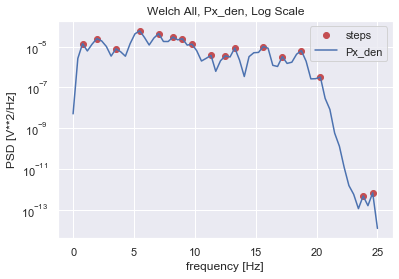

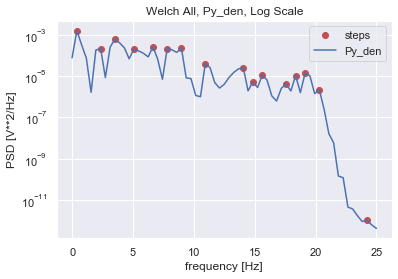

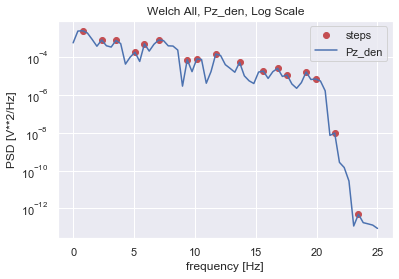

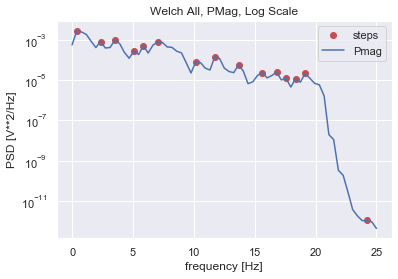

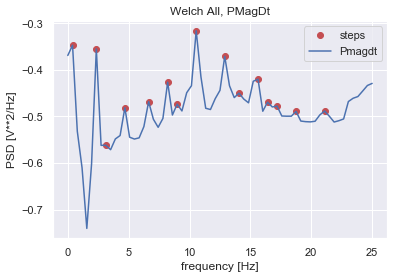

In [15]:
#Welch peaks
#example with first data point

#pz_den
idx = detect_peaks(Px_den[1],edge=edge,show=False)
plt.figure()
plt.semilogy(fx[idx],Px_den[1][idx],'o',color='r')
plt.semilogy(fx,Px_den[1],color='b')
plt.legend(['steps','Px_den'], loc='upper right');
plt.title("Welch All, Px_den, Log Scale");
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()

#py_den
idy = detect_peaks(Py_den[1],edge=edge,show=False)
plt.figure()
plt.semilogy(fy[idy],Py_den[1][idy],'o',color='r')
plt.semilogy(fy,Py_den[1],color='b')
plt.legend(['steps','Py_den'], loc='upper right');
plt.title("Welch All, Py_den, Log Scale");
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()

#pz_den
idz = detect_peaks(Pz_den[1],edge=edge,show=False)
plt.figure()
plt.semilogy(fz[idz],Pz_den[1][idz],'o',color='r')
plt.semilogy(fz,Pz_den[1],color='b')
plt.legend(['steps','Pz_den'], loc='upper right');
plt.title("Welch All, Pz_den, Log Scale");
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()

#mag
idx = detect_peaks(Pmag[1],edge=edge,show=False)
plt.plot()
plt.semilogy(fx[idx],Pmag[1][idx],'o',color='r')
plt.semilogy(fx, Pmag[1],color="b")
plt.legend(['steps','Pmag'], loc='upper right');
plt.title("Welch All, PMag, Log Scale");
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()

#magdt
idx = detect_peaks(Pmagdt[1],edge=edge,show=False)
plt.figure()
plt.plot(fx[idx],Pmagdt[1][idx],'o',color='r')
plt.plot(fx, Pmagdt[1],color="b")
plt.legend(['steps','Pmagdt'], loc='upper right');
plt.title("Welch All, PMagDt");
plt.xlabel('frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')
plt.show()



## Testing / Scoring

Save your final model as 'model'.

Code below will run it against the test data and plot the confusion matrix.

In [16]:
#feature selection

#features can include means/stds in TD: meanx_train, meany_train, meanz_train, stdx_train, stdy_train, stdz_train
#features can include raw acceleration in TD:  ax_train,ay_train, az_train
#features can include raw acceleration in FD: Px_den, Py_den, Pz_den, Pmag, Pmagdt
#features can include mean and std in FD: Pmeanx,Pmeany,Pmeanz,Pmeanmag,Pmeanmagdt,Pstdx,Pstdy,Pstdz,Pstdmag,Pstdmagdt
#features can include number of peaks in FD: widx, widy, widz, widmag, widmagdt

#array sizes are correct
print(np.shape(meanx_train), np.shape(meany_train), np.shape(meanz_train), np.shape(stdx_train), np.shape(stdy_train), np.shape(stdz_train))
print(np.shape(ax_train),np.shape(ay_train),np.shape(az_train))
print(np.shape(Px_den),np.shape(Py_den),np.shape(Pz_den), np.shape(Pmag), np.shape(Pmagdt))
print(np.shape(Pmeanx), np.shape(Pmeany), np.shape(Pmeanz), np.shape(Pmeanmag),np.shape(Pmeanmagdt),np.shape(Pstdx), np.shape(Pstdy), np.shape(Pstdz),np.shape(Pstdmag),np.shape(Pstdmagdt))
print(np.shape(widx), np.shape(widy), np.shape(widz), np.shape(widmag), np.shape(widmagdt))

#lets try everything except the raw features
#features = np.vstack([meanx_train, meany_train, meanz_train, stdx_train, stdy_train,stdz_train,Pmeanx,Pmeany,Pmeanz,Pmeanmag,Pmeanmagdt,Pstdx,Pstdy,Pstdz,Pstdmag,Pstdmagdt,widx,widy,widz,widmag,widmagdt])
#features=[meanx_train,meany_train,meanz_train, stdx_train, stdy_train,stdz_train,Pmeanx,Pmeany,Pmeanz,Pmeanmag,Pmeanmagdt,Pstdx,Pstdy,Pstdz,Pstdmag,Pstdmagdt,widx,widy,widz,widmag,widmagdt]

#training features
features = np.vstack((meanx_train,meany_train,meanz_train, stdx_train, stdy_train,stdz_train,Pmeanx,Pmeany,Pmeanz,Pmeanmag,Pmeanmagdt,Pstdx,Pstdy,Pstdz,Pstdmag,Pstdmagdt,widx,widy,widz,widmag,widmagdt)).T
np.shape(features)

features_all = np.concatenate((features,Pmagdt),axis=1)



(7352,) (7352,) (7352,) (7352,) (7352,) (7352,)
(7352, 128) (7352, 128) (7352, 128)
(7352, 65) (7352, 65) (7352, 65) (7352, 65) (7352, 65)
(7352,) (7352,) (7352,) (7352,) (7352,) (7352,) (7352,) (7352,) (7352,) (7352,)
(7352,) (7352,) (7352,) (7352,) (7352,)


In [17]:
#test data features

#ax_test, ay_test, az_test

meanx_test = np.mean(ax_test,axis=1)
meany_test = np.mean(ay_test,axis=1)
meanz_test = np.mean(az_test,axis=1)

stdx_test = np.std(ax_test,axis=1)
stdy_test = np.std(ay_test,axis=1)
stdz_test = np.std(az_test,axis=1)


fx, Px_den = signal.welch(ax_test, fs,nperseg = 128)
fy, Py_den = signal.welch(ay_test, fs,nperseg = 128)
fz, Pz_den = signal.welch(az_test, fs,nperseg = 128)

Pmag = np.sqrt(np.square(Px_den) + np.square(Py_den) + np.square(Pz_den))
Pmagdt = Pmag - np.mean(Pmag,axis=0)
Pmagdt = Pmagdt /np.std(Pmag,axis=0)

#features can include raw acceleration in FD: Px_den, Py_den, Pz_den, Pmag, Pmagdt


#or lets get mean and std in FD:
Pmeanx = np.mean(Px_den,axis=1)
Pmeany = np.mean(Py_den,axis=1)
Pmeanz = np.mean(Pz_den,axis=1)
Pmeanmag = np.mean(Pmag,axis=1)
Pmeanmagdt = np.mean(Pmagdt,axis=1)

Pstdx = np.std(Px_den,axis=1)
Pstdy = np.std(Py_den,axis=1)
Pstdz = np.std(Pz_den,axis=1)
Pstdmag = np.std(Pmag,axis=1)
Pstdmagdt = np.std(Pmagdt,axis=1)

widx=np.zeros(2947); widy=np.zeros(2947); widz=np.zeros(2947)
widmag=np.zeros(2947); widmagdt=np.zeros(2947)
for i in range(2947):
    widx[i] = len(detect_peaks(Px_den[i],edge=edge,show=False))
    widy[i] = len(detect_peaks(Py_den[i],edge=edge,show=False))
    widz[i] = len(detect_peaks(Pz_den[i],edge=edge,show=False))
    widmag[i] = len(detect_peaks(Pmag[i],edge=edge,show=False))
    widmagdt[i] = len(detect_peaks(Pmag[i],edge=edge,show=False))
    if (i%1000==0):
        print(i)

#testing features
features_test = np.vstack((meanx_test,meany_test,meanz_test, stdx_test, stdy_test,stdz_test,Pmeanx,Pmeany,Pmeanz,Pmeanmag,Pmeanmagdt,Pstdx,Pstdy,Pstdz,Pstdmag,Pstdmagdt,widx,widy,widz,widmag,widmagdt)).T
#np.shape(features_test)

features_testall = np.concatenate((features_test,Pmagdt),axis=1)

0
1000
2000


In [18]:
#SVC Linear
from sklearn.svm import SVC
#features = np.concatenate((ax_train, ay_train,az_train),axis=1)

model = SVC(kernel='linear')

get_ipython().run_line_magic('time', 'model.fit(features, y_train)')
get_ipython().run_line_magic('time', 'y_pred = model.predict(features_test)')

print("Train accuracy is %.2f " % (model.score(features, y_train)*100))
print("Test accuracy is %.2f " % (model.score(features_test, y_test)*100))

CPU times: user 861 ms, sys: 8.23 ms, total: 869 ms
Wall time: 768 ms
CPU times: user 158 ms, sys: 532 µs, total: 158 ms
Wall time: 161 ms
Train accuracy is 90.55 
Test accuracy is 23.75 


In [19]:
a_test=features_test

In [20]:
#After loading the test data
#Assuming your model is named 'model'
y_model = model.predict(a_test)

# Predict on test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.2375296912114014

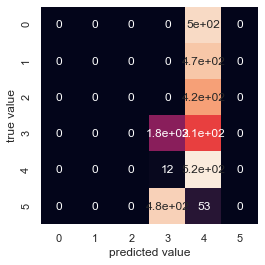

In [21]:
#Confusion matrix to visualize your performance 

%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False) #, cmap='YlGnBu', flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
#SVC RBF
features = np.concatenate((ax_train, ay_train,az_train),axis=1)
features_test = np.concatenate((ax_test, ay_test,az_test),axis=1)

model = SVC(kernel='linear',C=75)

get_ipython().run_line_magic('time', 'model.fit(features, y_train)')
get_ipython().run_line_magic('time', 'y_pred = model.predict(features_test)')

print("Train accuracy is %.2f " % (model.score(features, y_train)*100))
print("Test accuracy is %.2f " % (model.score(features_test, y_test)*100))

#After loading the test data
#Assuming your model is named 'model'
y_model = model.predict(features_test)

# Predict on test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)


mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False) #, cmap='YlGnBu', flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
#SVC RBF

model = SVC()

get_ipython().run_line_magic('time', 'model.fit(features_all, y_train)')
get_ipython().run_line_magic('time', 'y_pred = model.predict(features_testall)')

print("Train accuracy is %.2f " % (model.score(features_all, y_train)*100))
print("Test accuracy is %.2f " % (model.score(features_testall, y_test)*100))

#After loading the test data
#Assuming your model is named 'model'
y_model = model.predict(features_testall)

# Predict on test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)


mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False) #, cmap='YlGnBu', flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');